In [116]:
#import useful libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# to render the figures in the notebook
%matplotlib inline 



# Load RNA dataset

In [117]:
#read in the RNA-Seq dataset
#FPKM - Fragments Per Kilobase of transcript per Million mapped reads.
#dataset is tab seperated so '\t' must be used as the seperator
rna_seq = pd.read_csv('log2FPKM.tsv',sep = '\t')
rna_seq.head()
# With FPKM data, read depth normalisation has already been done

,00gene_id,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
0,1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
1,A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
2,A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
3,A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
4,A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


In [118]:
# rename one of the columns to make the dataset clearer 
rna_seq.rename({'00gene_id':'gene_id'}, axis = 1, inplace = True)
#create an index
rna_seq.set_index('gene_id', inplace = True)
rna_seq.head()

,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


In [119]:
#transpose the dataframe to get it ready for pca
rna_seq = rna_seq.transpose()
rna_seq.head()

gene_id,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
NB001,0.834381,1.910053,1.453191,0.005102,0.580151,5.137167,0.027558,0.170671,1.535670,0.057101,...,3.651545,5.045111,1.575337,2.395551,3.466692,0.862512,3.561729,5.039327,3.245179,3.296496
NB002,0.743094,0.941996,0.640614,0.005902,0.738233,5.116157,0.000000,0.000000,1.038092,0.066125,...,3.617510,5.037365,1.487028,2.748315,3.201112,0.051655,3.595790,5.144157,2.843600,3.052771
NB003,0.909414,1.950857,1.156765,0.005192,0.927667,5.405414,0.028036,0.045284,0.943194,0.000000,...,3.547080,4.721531,1.508530,2.482464,3.056684,0.022912,2.236695,4.982975,2.880531,2.431521
NB004,0.795775,1.989477,1.525277,0.000000,0.936497,6.034460,0.000000,0.044204,1.091341,0.028540,...,3.699507,4.157084,1.351250,2.447746,3.081720,0.108028,3.312516,6.142091,2.864198,3.119886
NB005,0.905540,1.942946,1.365043,0.025347,0.924853,5.613060,0.000000,0.000000,1.549078,0.032056,...,3.582977,4.766362,1.038738,1.890104,2.823576,0.049621,2.235632,5.236531,2.761698,2.226502


# Load Patient metadata

In [120]:
#load in the patient factors, including potential endpoints
patient_info = pd.read_csv('patientInfo.tsv',sep = '\t').set_index('ID')
patient_info.head()

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB497,female,379,0.0,0.0,1,0.0
NB496,male,132,NaN,NaN,NaN,NaN
NB495,male,163,0.0,0.0,1,0.0
NB494,male,56,NaN,NaN,NaN,NaN


In [121]:
# Some of the factor values are removed from the patient information
# These can be predicted with ML using either RNA-seq or microarray datasets
# To predict these values we must seperate the na samples into a prediction set and split the known samples into a train and test subset.

#split data based on known and unknown factors
patient_info_known = patient_info[patient_info['FactorValue..death.from.disease.'].notna()]
patient_info_unknown =  patient_info[patient_info['FactorValue..death.from.disease.'].isna()]
patient_info_known.head()


,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB497,female,379,0.0,0.0,1,0.0
NB495,male,163,0.0,0.0,1,0.0
NB493,male,190,0.0,0.0,1,0.0
NB491,male,2326,0.0,1.0,4,1.0
NB489,female,865,0.0,1.0,4,0.0


In [122]:
patient_info_unknown.head()

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB496,male,132,NaN,NaN,NaN,NaN
NB494,male,56,NaN,NaN,NaN,NaN
NB492,male,947,NaN,NaN,NaN,NaN
NB490,female,1759,NaN,NaN,NaN,NaN


In [123]:
patient_info_known.shape

(249, 6)

# Subset RNA data to only include samples with corresponding metadata


In [125]:
rna_seq.shape

(498, 23146)

In [13]:
# check how many of the samples (rows) overlap between the metadata and rna dataset. 
# We expect all 249 samples to be found in the rna dataset.
sum((patient_info_known.index).isin(rna_seq.index))

84

Only 84 of the samples overlap, so let's check that the labelling method is the same.

In [126]:
print(set([len(x) for x in patient_info_known.index]))
print(set([len(x) for x in rna_seq.index]))

{5}
{26, 5}


Here is the issue, it seems that the rna dataset has some sample labels made of 5 characters and others made of 26 characters.

In [127]:
# closer look at the sample labels in rna.
rna_seq.index[0:100]

Index(['NB001', 'NB002', 'NB003', 'NB004', 'NB005', 'NB006', 'NB007', 'NB008',
       'NB009', 'NB010', 'NB011', 'NB012', 'NB013_BC02FPACXX_L1_CGATGT',
       'NB014_BC02FPACXX_L1_TGACCA', 'NB015_BC02FPACXX_L1_ACAGTG',
       'NB016_BC02FPACXX_L1_GCCAAT', 'NB017_BC02FPACXX_L1_CAGATC',
       'NB018_BC02FPACXX_L1_CTTGTA', 'NB019_BC02FPACXX_L2_CGATGT',
       'NB020_BC02FPACXX_L2_TGACCA', 'NB021_BC02FPACXX_L2_ACAGTG',
       'NB022_BC02FPACXX_L2_GCCAAT', 'NB023_BC02FPACXX_L2_CAGATC',
       'NB024_BC02FPACXX_L2_CTTGTA', 'NB025_BC02FPACXX_L3_CGATGT',
       'NB026_BC02FPACXX_L3_TGACCA', 'NB027_BC02FPACXX_L3_ACAGTG',
       'NB028_BC02FPACXX_L3_GCCAAT', 'NB029_BC02FPACXX_L3_CAGATC',
       'NB030_BC02FPACXX_L3_CTTGTA', 'NB031_BC02FPACXX_L4_CGATGT',
       'NB032_BC02FPACXX_L4_TGACCA', 'NB033_BC02FPACXX_L4_ACAGTG',
       'NB034_BC02FPACXX_L4_GCCAAT', 'NB035_BC02FPACXX_L4_CAGATC',
       'NB036_BC02FPACXX_L4_CTTGTA', 'NB037_BC02FPACXX_L5_CGATGT',
       'NB038_BC02FPACXX_L5_TGACCA', 'NB039_

We need to adjust these sample labels to match the metadata.

In [128]:
rna_seq.index = [(x[0:5]) for x in rna_seq.index]

In [129]:
#check how many sample  labels match now between the rna dataset and the metadata.
sum((patient_info_known.index).isin(rna_seq.index))

249

They all match, so now we can add the metadata to the rna_dataset


In [130]:
rna_seq = rna_seq.join(patient_info_known)

In [131]:
rna_seq  = rna_seq[rna_seq['FactorValue..death.from.disease.'].notna()]
rna_seq.head()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZYG11B,ZYX,ZZEF1,ZZZ3,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
NB001,0.834381,1.910053,1.453191,0.005102,0.580151,5.137167,0.027558,0.170671,1.535670,0.057101,...,3.561729,5.039327,3.245179,3.296496,male,987.0,1.0,1.0,4,1.0
NB003,0.909414,1.950857,1.156765,0.005192,0.927667,5.405414,0.028036,0.045284,0.943194,0.000000,...,2.236695,4.982975,2.880531,2.431521,female,625.0,1.0,1.0,4,1.0
NB005,0.905540,1.942946,1.365043,0.025347,0.924853,5.613060,0.000000,0.000000,1.549078,0.032056,...,2.235632,5.236531,2.761698,2.226502,female,536.0,1.0,1.0,4,1.0
NB007,1.811352,1.617745,1.304178,0.000000,1.018705,6.956301,0.000000,0.210127,1.959344,0.164813,...,3.130989,5.645258,2.755304,2.933508,male,942.0,0.0,1.0,4,1.0
NB009,0.981855,1.436439,0.771248,0.021880,0.666877,5.170205,0.000000,0.000000,1.374772,0.031028,...,2.361504,5.393207,2.730553,2.271136,female,217.0,0.0,1.0,4S,0.0


# Perform a PCA on the RNA dataset

In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
# standardise the dataset first
exclude_columns = ["FactorValue..Sex.","FactorValue..age.at.diagnosis.","FactorValue..death.from.disease.","FactorValue..high.risk.","FactorValue..inss.stage.","FactorValue..progression."]

scaler = StandardScaler()
scaler.fit(rna_seq.drop(columns=exclude_columns))
scaled_rna = scaler.transform(rna_seq.drop(columns=exclude_columns))

In [47]:
#perform PCA
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=4)

In [49]:
pca.fit(scaled_rna)
rna_pca = pca.transform(scaled_rna)

In [50]:
rna_pca.shape

(249, 4)

Text(0, 0.5, 'PC2')

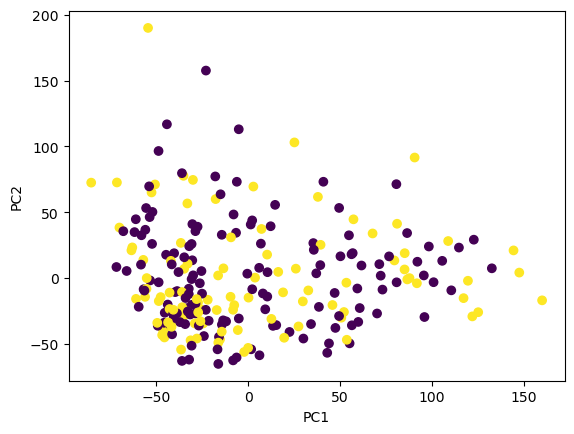

In [59]:
#plot the pca - colour based on sex
color_map = {'male': 0, 'female': 1}
colours = rna_seq['FactorValue..Sex.'].map(color_map)

plt.figure()
plt.scatter(x = rna_pca[:,0], y = rna_pca[:,1] ,c=colours)
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

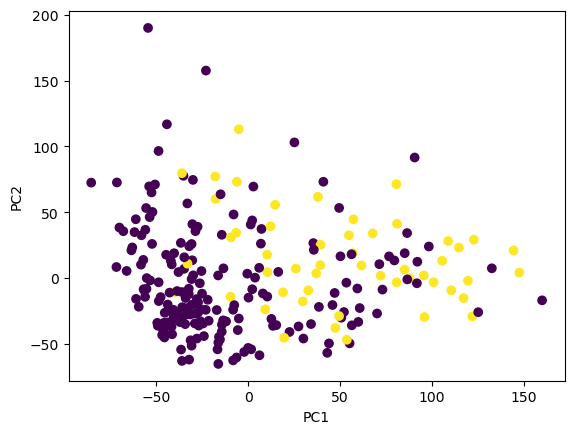

In [62]:
#plot the pca - colour based on death from disease.
plt.figure()
plt.scatter(x = rna_pca[:,0], y = rna_pca[:,1] ,c=rna_seq['FactorValue..death.from.disease.'])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

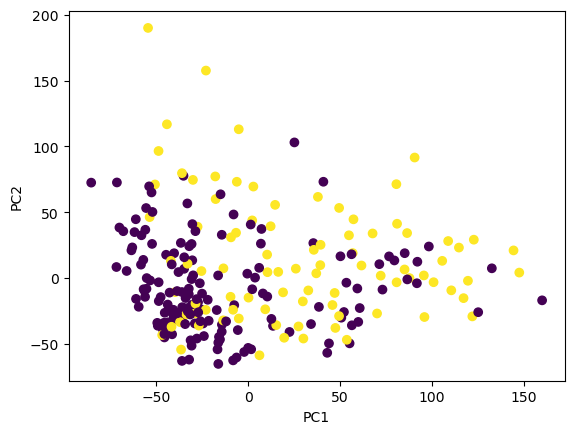

In [61]:
#plot the pca - colour based on progression.
plt.figure()
plt.scatter(x = rna_pca[:,0], y = rna_pca[:,1] ,c=rna_seq['FactorValue..progression.'])
plt.xlabel('PC1')
plt.ylabel('PC2')

When looking at PC1 and PC2 there are no obvious outliers

To ensure that I dont have too many features fed into my ML models, I will perform regularisation on my dataset using LASSO. But first we must split the data into a train and test set.

# Split the Data into a Train and Test set.

In [63]:
from sklearn.model_selection import train_test_split

In [97]:
X = rna_seq.drop(columns=['FactorValue..Sex.','FactorValue..age.at.diagnosis.','FactorValue..death.from.disease.','FactorValue..high.risk.','FactorValue..inss.stage.','FactorValue..progression.'])
y = rna_seq['FactorValue..death.from.disease.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [79]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

In [99]:

sel = SelectFromModel(
    LogisticRegression(C = 0.5, penalty = 'l1', solver='liblinear', random_state=42))
sel.fit(scaler.transform(X_train), y_train)


SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'))

In [100]:
# see how many features will be kept: 
sum(sel.get_support())
# The vast majority of features have been removed, from 23,000+ features to 90.

90

In [101]:
remove_features = X_train.columns[(sel.estimator_.coef_ == 0).ravel().tolist()]
remove_features

Index(['1/2-SBSRNA4', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2LD1', 'A2M', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=23056)

Remove these features from the training set.

In [102]:
X_train_selected = sel.transform(scaler.transform(X_train))
X_test_selected = sel.transform(scaler.transform(X_test))

In [104]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(174, 90)
(75, 90)


# Build a Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix,classification_report

In [112]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        63
         1.0       0.39      0.58      0.47        12

    accuracy                           0.79        75
   macro avg       0.65      0.70      0.67        75
weighted avg       0.83      0.79      0.80        75

[[52 11]
 [ 5  7]]


In [115]:
# Is the target variable unbalanced?
rna_seq['FactorValue..death.from.disease.'].value_counts()

FactorValue..death.from.disease.
0.0    198
1.0     51
Name: count, dtype: int64

Because the target variable, death from disease, is highly unbalanced (there are 198 samples that did not die and 51 that did), an F1 score will be a better indicator of the model's performance compared to accuracy. The F1 score for not dying was 0.87 for predicting no death compared to 0.47 for predicting death. This is likely because no death is the majority class, so it has learnt to predict this more. 
Overall, the model is not good at predicting death. 

# Gradient Boosting Classifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
GBpred = GB.predict(X_test)

In [150]:
print(classification_report(y_test, GBpred))
print(confusion_matrix(y_test, GBpred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        63
         1.0       0.43      0.50      0.46        12

    accuracy                           0.81        75
   macro avg       0.67      0.69      0.67        75
weighted avg       0.83      0.81      0.82        75

[[55  8]
 [ 6  6]]


Overall this models performance was very similar to the random forest

# K Nearest Neighbor Classifier

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)

In [154]:
print(classification_report(y_test, KNN_pred))
print(confusion_matrix(y_test, KNN_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88        63
         1.0       0.41      0.58      0.48        12

    accuracy                           0.80        75
   macro avg       0.66      0.71      0.68        75
weighted avg       0.83      0.80      0.81        75

[[53 10]
 [ 5  7]]


Again KNN performed very similarly to both the Random Forest and Gradient Boosting Models.